In [12]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os

os.chdir('/content/drive/My Drive/verimadenciligi/hafta12')

In [3]:
#1. veri setini yükleme

import pandas as pd

data=pd.read_csv('Mall_Customers.csv')

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

import seaborn as sns

# 2. Gereksiz sütunları kaldırma

data = data.drop(columns=['CustomerID'])

# 3. Kategorik veriyi sayısal veriye dönüştürme

data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# 4. Özellikleri seçme

X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# 5. Veri ön işleme

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

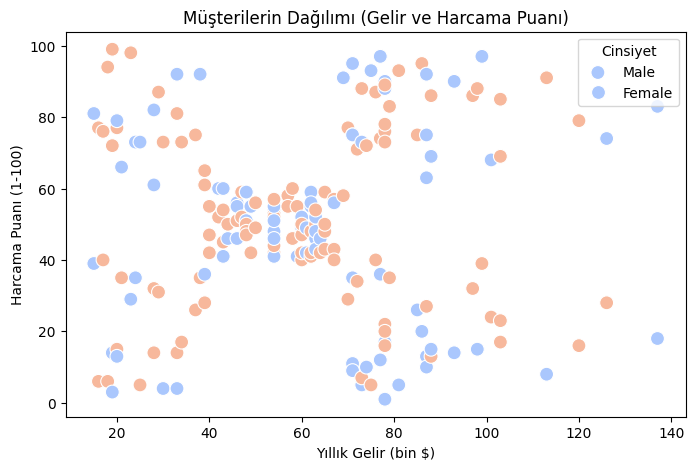

In [5]:
# 6. Verilerin dağılımını görselleştirme

plt.figure(figsize=(8, 5))

sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', palette='coolwarm', s=100)

plt.title('Müşterilerin Dağılımı (Gelir ve Harcama Puanı)')

plt.xlabel('Yıllık Gelir (bin $)')

plt.ylabel('Harcama Puanı (1-100)')

plt.legend(title='Cinsiyet', labels=['Male', 'Female'])

plt.show()

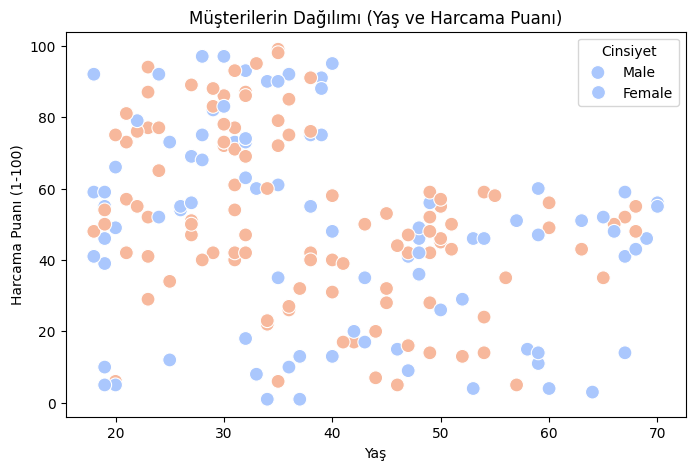

In [6]:
plt.figure(figsize=(8, 5))

sns.scatterplot(data=data, x='Age', y='Spending Score (1-100)', hue='Gender', palette='coolwarm', s=100)

plt.title('Müşterilerin Dağılımı (Yaş ve Harcama Puanı)')

plt.xlabel('Yaş')

plt.ylabel('Harcama Puanı (1-100)')

plt.legend(title='Cinsiyet', labels=['Male', 'Female'])

plt.show()

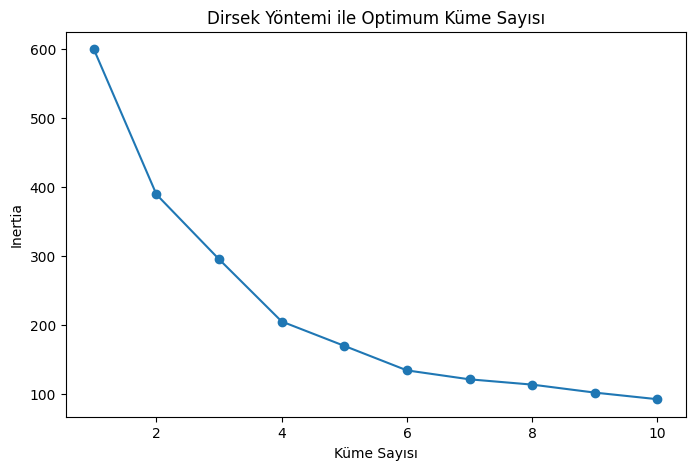

In [9]:
# 7. Optimum küme sayısını belirleme (Dirsek Yöntemi)

inertia = []

k_range = range(1, 11)

for k in k_range:

     kmeans = KMeans(n_clusters=k, random_state=42)

     kmeans.fit(X_scaled)

     inertia.append(kmeans.inertia_)



plt.figure(figsize=(8, 5))

plt.plot(k_range, inertia, marker='o')

plt.title('Dirsek Yöntemi ile Optimum Küme Sayısı')

plt.xlabel('Küme Sayısı')

plt.ylabel('Inertia')

plt.show()

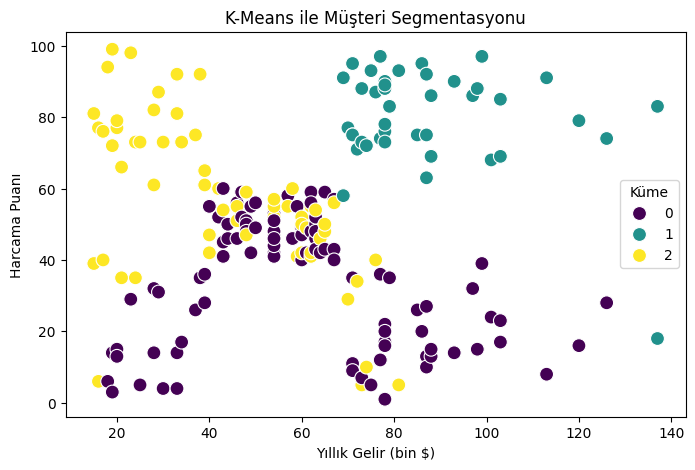

In [10]:
# 8. K-Means kümeleme (Örneğin, 5 küme)

kmeans = KMeans(n_clusters=3, random_state=42)

data['Cluster'] = kmeans.fit_predict(X_scaled)



# 9. Sonuçları görselleştirme (Yıllık Gelir ve Harcama Puanı kullanılarak)

plt.figure(figsize=(8, 5))

sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100)

plt.title('K-Means ile Müşteri Segmentasyonu')

plt.xlabel('Yıllık Gelir (bin $)')

plt.ylabel('Harcama Puanı')

plt.legend(title='Küme')

plt.show()

In [11]:
# 10. Her kümenin ortalama değerlerini hesaplama

cluster_summary = data.groupby('Cluster').mean()

print(cluster_summary)

           Gender        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                 
0        0.552083  50.406250           60.468750               33.343750
1        0.536585  32.853659           87.341463               79.975610
2        0.587302  25.142857           43.269841               56.507937
